# Feature Selection: PCA

To get an idea about which features might be correlated, we perform a Principal Component Analysis (PCA). The result is presented in {numref}`fig:biplot` as a biplot of the first two principal components.

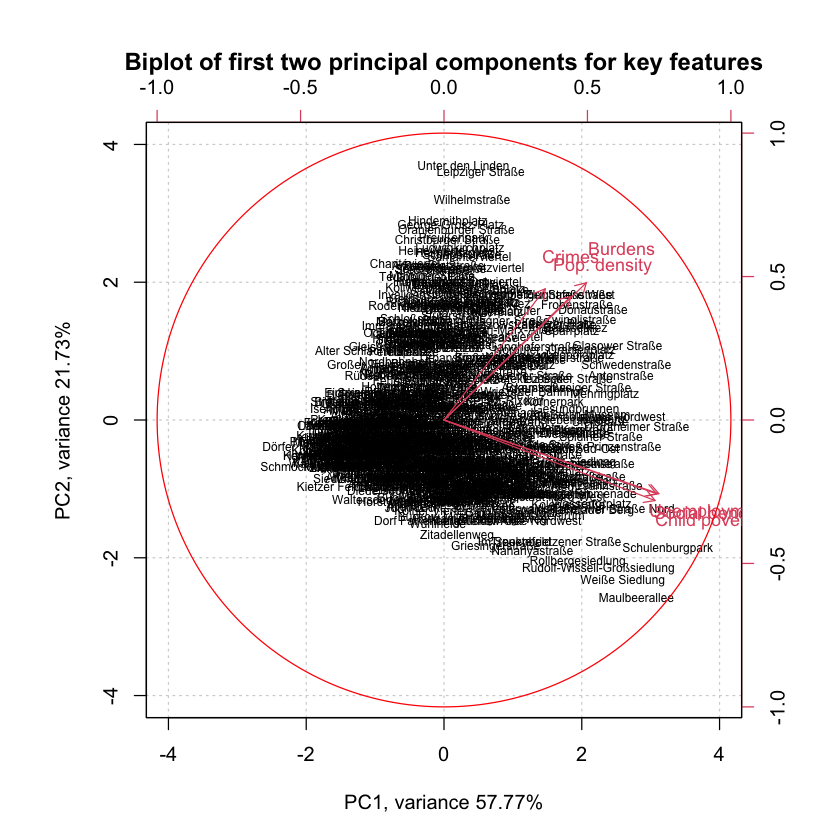

In [1]:
# Change the directory to where the data is stored
setwd("/Users/robert/Documents/Master Data Science/2. Semester/Data Visualization/PROJECT/VisuProj23")
df <- read.csv("data/07_kernfeatures.csv")
df$LOR_str <- sprintf("%08d", df$LOR_str)
df[273,4] = "Schloßstraße Stegl."
df[407,4] = "Schloßstraße Ch'burg"
row.names(df) <- df$PLR_NAME
dfnew <- df[, -c(1:4)]
colnames(dfnew) <- c("Unemployment", "Social benefits", "Child poverty", "Pop. density", "Burdens", "Crimes")


# Perform PCA
one_prcomp <- prcomp(dfnew, scale. = TRUE)
PCs_prcomp <- one_prcomp$x
PCvariances <- one_prcomp$sdev^2

# Create a biplot
biplot(one_prcomp, pc.biplot=TRUE,
       xlab=paste0("PC1, variance ", round(PCvariances[1]/6*100, 2),"%"), 
       ylab=paste0("PC2, variance ", round(PCvariances[2]/6*100, 2),"%"), 
       main="Biplot of first two principal components for key features",
       xlim=c(-4,4), ylim=c(-4,4), cex=c(0.6,0.9),
       expand=1.2, asp=1, bg = "darkgrey", panel.first = grid())
symbols(0, 0, circles = 1, inches=FALSE, add=TRUE, fg="red")

```{figure} plots/biplot.JPG
---
height: 500px
name: fig:biplot
---
Biplot of the first two principal components. Features are population density, overall crime rate, number of burdens, social benefits receiver rate, and child poverty rate.
```
The biplot hints at two possible correlations. On the one hand between child poverty, social benefits, and unemployment rate, on the other hand between overall crime rate, number of burdens, and population density.